<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn. metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.pipeline import  make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    train = pd.read_csv('gold_industry_train.csv')
    test = pd.read_csv('gold_industry_test.csv')
    full = pd.read_csv('gold_industry_full.csv')
except:
    train = pd.read_csv('/datasets/gold_industry_train.csv')
    test = pd.read_csv('/datasets/gold_industry_test.csv')
    full = pd.read_csv('/datasets/gold_industry_full.csv') 

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [6]:
train.duplicated().sum()

0

In [7]:
test.duplicated().sum()

0

In [8]:
full.duplicated().sum()

0

In [9]:
train.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,14579.000000,14579.000000,14507.000000,14502.000000,14572.000000,14478.000000,14548.000000,14572.000000,14579.000000,14579.000000,...,13659.000000,14579.000000,14578.000000,14578.000000,14387.000000,14579.000000,14579.000000,14578.000000,14504.000000,14574.000000
mean,8.352941,8.877460,3.604221,36.561420,474.332784,58.922712,12.427399,5.994854,1104.208278,-379.367166,...,7.111347,43.979499,5.192145,9.923809,9.566676,66.759066,3.087939,9.731972,2.719985,10.612745
std,1.934376,1.922536,1.056063,5.209823,108.503552,22.407410,3.428939,1.152873,162.235606,94.652311,...,3.909951,5.471437,1.388014,1.706976,2.805654,10.619709,0.915187,2.358143,0.958929,2.871075
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.049194,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.932996,7.341922,2.880490,34.093951,411.048483,47.278490,10.002832,5.304167,999.644856,-499.861797,...,3.784897,43.345906,4.283347,9.103183,7.860030,63.114596,2.505287,8.088928,2.036512,9.013412
50%,8.225284,8.715859,3.532399,37.097511,498.187968,54.361187,12.003320,6.003053,1000.982624,-300.314199,...,7.629968,44.975014,5.118647,10.046455,9.301970,67.962788,3.029238,9.818512,2.774847,10.670515
75%,9.832210,10.255843,4.257282,39.899799,549.586552,64.464926,14.929903,6.796632,1292.663971,-299.989315,...,10.367050,46.275153,5.925380,10.981203,11.001573,72.598187,3.614098,11.169187,3.353845,12.130827
max,13.731330,14.596026,7.052325,53.475325,717.508837,484.967466,36.118275,9.703448,1512.299531,-273.776101,...,26.000772,52.756638,16.001945,16.705297,19.423912,100.000000,8.245022,19.552149,5.804178,22.317730


In [10]:
test.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,4860.000000,4860.000000,4832.000000,4838.000000,4856.000000,4816.000000,4857.000000,4859.000000,4859.000000,4859.000000,...,4.859000e+03,4859.000000,4.859000e+03,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,8.005584,8.547348,3.579662,37.095864,490.285103,59.113400,12.055735,6.101308,1108.635895,-368.340127,...,1.985770e+01,-488.665140,1.557025e+01,-464.176507,16.594103,-490.815250,12.945971,-489.583564,19.053888,-504.678924
std,1.993590,1.958601,1.029377,4.926284,94.371623,19.125122,3.407642,1.042754,156.493143,91.155929,...,5.913105e+00,44.392714,4.927361e+00,65.706994,5.724305,32.258443,5.533176,37.084609,5.548996,38.690186
min,0.010000,0.010000,0.010000,0.010000,0.012786,0.046369,0.018907,0.015783,300.792494,-600.568138,...,1.079872e-16,-799.704969,2.489718e-17,-799.860767,-0.371498,-797.142475,1.358469,-800.006180,0.160386,-809.734800
25%,6.574363,6.975898,2.903612,34.510841,434.099695,47.596984,9.890429,5.499808,999.715729,-499.731972,...,1.501123e+01,-500.704004,1.202172e+01,-500.196517,11.073822,-500.483564,9.011890,-500.129913,14.963953,-500.668501
50%,7.812923,8.179714,3.540772,37.499761,502.118742,55.509481,11.997859,6.099805,1001.414798,-300.181367,...,1.996807e+01,-499.892919,1.501240e+01,-499.540776,16.631195,-499.873136,11.999417,-499.955304,19.960006,-500.033769
75%,9.556589,10.084339,4.199847,40.461315,555.596563,66.661547,14.496072,6.802101,1202.837565,-299.961547,...,2.498900e+01,-498.652030,1.999949e+01,-400.302329,19.983191,-498.852815,15.004198,-499.643776,24.974583,-499.460134
max,13.417156,14.533698,7.142594,53.477742,702.523396,363.989699,30.010759,9.396928,1521.980372,-281.039299,...,3.008450e+01,-383.373053,2.398898e+01,-114.250832,33.215996,-288.963521,24.177106,-141.934397,32.028529,-104.427459


In [11]:
full.describe()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
count,19439.000000,19439.000000,19339.000000,19340.000000,19428.000000,19294.000000,19405.000000,19431.000000,19438.000000,19438.000000,...,17691.000000,19439.000000,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000
mean,8.266097,8.794927,3.598085,36.695114,478.320042,58.970310,12.334373,6.021474,1105.315068,-376.610690,...,7.167247,44.076513,5.168470,9.978895,9.501224,67.050208,3.042467,9.688589,2.705795,10.583728
std,1.955092,1.936847,1.049486,5.145445,105.373758,21.634478,3.427317,1.127263,160.826798,93.909667,...,3.916079,5.129784,1.372348,1.669240,2.787537,10.125840,0.922808,2.328642,0.949077,2.868782
min,0.010000,0.010000,0.010000,0.010000,0.002986,0.046369,0.001083,0.000568,-0.042069,-657.949759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.854384,7.237967,2.887280,34.207799,416.525453,47.435103,10.000362,5.398678,999.661867,-499.835165,...,3.845475,43.402215,4.251240,9.137262,7.722820,63.299712,2.461138,8.062878,2.040119,8.938947
50%,8.125839,8.593574,3.534895,37.202650,499.416120,54.610197,12.001174,6.008273,1001.072890,-300.263994,...,7.685827,45.011244,5.066094,10.102433,9.218961,68.172738,2.984909,9.743623,2.748730,10.622456
75%,9.769917,10.213771,4.244161,40.039133,550.172183,65.023044,14.716595,6.798051,1205.620588,-299.981998,...,10.411296,46.275313,5.895527,11.035769,10.947813,72.686642,3.571351,11.134294,3.333216,12.104271
max,13.731330,14.596026,7.142594,53.477742,717.508837,484.967466,36.118275,9.703448,1521.980372,-273.776101,...,26.000772,52.756638,16.001945,17.031899,19.615720,100.000000,8.245022,19.552149,5.804178,22.317730


Промежуточные выводы:

1. Во всех таблицах присутствуют пропуски данных, которые требуют дополнительной обработки и заполнения. Это может быть выполнено с использованием различных методов, таких как заполнение нулевыми значениями, средними значениями или интерполяцией.

2. В выборке "test" отсутствуют некоторые признаки, которые присутствуют в таблицах "full" и "train". Это означает, что для проведения анализа и прогнозирования на основе этих признаков необходимо использовать только данные из таблиц "full" и "train".

3. Целевыми признаками для анализа являются "rougher.output.recovery" и "final.output.recovery". Они являются ключевыми показателями для оценки эффективности процесса обогащения руды. Анализ и прогнозирование этих признаков могут быть полезными для оптимизации процесса и повышения его эффективности.

## Анализ данных

In [12]:
def cft_calc(C, F, T):
    
    divident = (C*(F-T))
    divider =(F*(C-T))
    
    rec = divident / divider * 100
   
    return rec

In [13]:
necessary = train.dropna().reset_index()

roc_au = necessary['rougher.output.concentrate_au']
rif_au = necessary['rougher.input.feed_au']
rot_au = necessary['rougher.output.tail_au']
recovery = cft_calc(roc_au,rif_au,rot_au)
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
12332    87.684717
12333    90.677361
12334    89.574376
12335    87.724007
12336    88.890579
Length: 12337, dtype: float64

In [14]:
ror = necessary['rougher.output.recovery']

mae(ror,recovery)

9.906677443564516e-15

Средняя абсолютная ошибка между значениями, полученными в результате расчетов и значениями признака rougher.output.recovery, является крайне незначительной (всего лишь 9.74 × 10 в степени -15). Следовательно, можно сделать вывод о правильности эффективности в выборке train.

In [15]:
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')
train.isna().values.any(),test.isna().values.any()

(False, False)

Все отсутствующие признаки в выборке test относятся к типу float.<br>

В test отсутствует 34 признака, из которых 30 относятся к типу output (параметры продукта), а 4 - к типу calculation (расчетные характеристики).

Для дальнейшего анализа необходимо добавить в выборку test целевые признаки из полной выборки (full), а на этапе обучения удалить из выборки train признаки, отсутствующие в test.

In [16]:
full = full[(full['rougher.input.feed_ag'] >= 1) &
            (full['rougher.input.feed_pb'] >= 1) &
            (full['rougher.input.feed_sol'] >= 1) &
            (full['rougher.input.feed_au'] >= 1) &
            (full['rougher.output.concentrate_ag'] >= 1) &
            (full['rougher.output.concentrate_pb'] >= 1) &
            (full['rougher.output.concentrate_sol'] >= 1) &
            (full['rougher.output.concentrate_au'] >= 1) &
            (full['primary_cleaner.output.concentrate_ag'] >= 1) &
            (full['primary_cleaner.output.concentrate_pb'] >= 1) &
            (full['primary_cleaner.output.concentrate_sol'] >= 1) &
            (full['primary_cleaner.output.concentrate_au'] >= 1) &
            (full['final.output.concentrate_ag'] >= 1) &
            (full['final.output.concentrate_pb'] >= 1) &
            (full['final.output.concentrate_sol'] >= 1) &
            (full['final.output.concentrate_au'] >= 1)]

train = train[(train['rougher.input.feed_ag'] >= 1) &
            (train['rougher.input.feed_pb'] >= 1) &
            (train['rougher.input.feed_sol'] >= 1) &
            (train['rougher.input.feed_au'] >= 1) &
            (train['rougher.output.concentrate_ag'] >= 1) &
            (train['rougher.output.concentrate_pb'] >= 1) &
            (train['rougher.output.concentrate_sol'] >= 1) &
            (train['rougher.output.concentrate_au'] >= 1) &
            (train['primary_cleaner.output.concentrate_ag'] >= 1) &
            (train['primary_cleaner.output.concentrate_pb'] >= 1) &
            (train['primary_cleaner.output.concentrate_sol'] >= 1) &
            (train['primary_cleaner.output.concentrate_au'] >= 1) &
            (train['final.output.concentrate_ag'] >= 1) &
            (train['final.output.concentrate_pb'] >= 1) &
            (train['final.output.concentrate_sol'] >= 1) &
            (train['final.output.concentrate_au'] >= 1)]

test = test[(test['rougher.input.feed_ag'] >= 1) &
            (test['rougher.input.feed_pb'] >= 1) &
            (test['rougher.input.feed_sol'] >= 1) &
            (test['rougher.input.feed_au'] >= 1)]

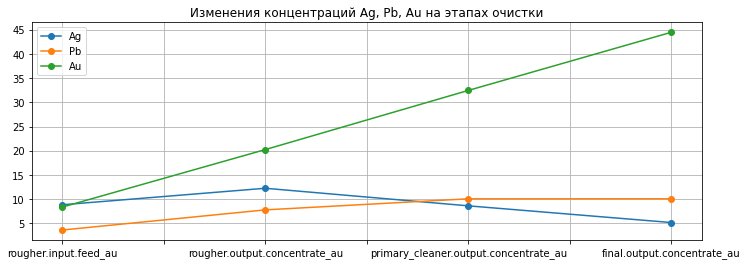

In [17]:
ag = full[['rougher.input.feed_ag',
            'rougher.output.concentrate_ag',
            'primary_cleaner.output.concentrate_ag',
            'final.output.concentrate_ag']].mean(axis=0)

pb = full[['rougher.input.feed_pb',
            'rougher.output.concentrate_pb',
            'primary_cleaner.output.concentrate_pb',
            'final.output.concentrate_pb']].mean(axis=0)

au = full[['rougher.input.feed_au',
            'rougher.output.concentrate_au',
            'primary_cleaner.output.concentrate_au',
            'final.output.concentrate_au']].mean(axis=0)

ag.plot(style='-o', grid=True, figsize=(12,4), label='Ag')
pb.plot(style='-o', grid=True, figsize=(12,4), label='Pb')
au.plot(style='-o', grid=True, figsize=(12,4), label='Au')

plt.title('Изменения концентраций Ag, Pb, Au на этапах очистки')
plt.legend()
plt.show()

По результатам анализа, можно сделать следующие выводы:

1. Концентрация серебра (Ag) снижается на этапе флотации. Это может указывать на то, что значительное количество серебра остается в отвальных хвостах. Возможно, стоит пересмотреть технологию очистки с целью увеличения извлечения серебра.
2. Концентрация свинца (Pb) повышается с каждым этапом обработки, хотя это происходит с небольшими темпами. Возможно, стоит проанализировать процессы обогащения свинца на предмет оптимизации и увеличения эффективности извлечения.
3. Концентрация золота (Au) также повышается с каждым этапом обработки, причем это происходит более быстро. Это положительный фактор, так как конечным продуктом является золото. Видимо, технология обогащения золота работает достаточно эффективно, и не требует значительного изменения.

In [18]:
concentrate = pd.DataFrame()

concentrate['rougher_output'] = full['rougher.output.concentrate_ag'] \
+full['rougher.output.concentrate_pb'] \
+full['rougher.output.concentrate_sol'] \
+full['rougher.output.concentrate_au']

concentrate['cleaner_output'] = full['primary_cleaner.output.concentrate_ag'] \
+full['primary_cleaner.output.concentrate_pb'] \
+full['primary_cleaner.output.concentrate_sol'] \
+full['primary_cleaner.output.concentrate_au']

concentrate['fin'] = full['final.output.concentrate_ag'] \
+full['final.output.concentrate_pb'] \
+full['final.output.concentrate_sol'] \
+full['final.output.concentrate_au']

concentrate

,rougher_output,cleaner_output,fin
0,66.424950,72.640924,63.644396
1,67.012710,72.543485,63.957723
2,66.103793,72.095042,64.311180
3,65.752751,59.957723,63.573449
4,65.908382,71.321010,64.004667
...,...,...,...
19434,62.875473,47.398055,65.234882
19435,64.971535,71.707167,65.978097
19436,65.149381,72.833250,65.560640
19437,66.016067,56.436665,64.657968


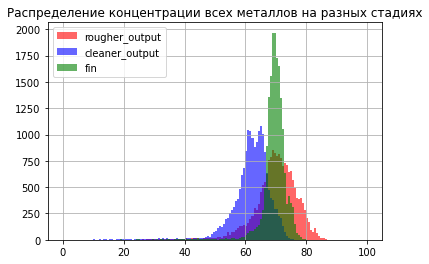

In [19]:
hist1 = concentrate['rougher_output']
hist2 = concentrate['cleaner_output']
hist3 = concentrate['fin']

hist1.hist(bins=150, color='red', label='rougher_output', range=(0, 100), alpha=0.6)
hist2.hist(bins=150, color='blue', label='cleaner_output', range=(0, 100), alpha=0.6)
hist3.hist(bins=150, color='green', label='fin', range=(0, 100), alpha=0.6)

plt.rcParams['figure.figsize'] = (20, 5)
plt.legend()
plt.title('Распределение концентрации всех металлов на разных стадиях')
plt.show()

Промежуточные выводы:

Обнаружено наличие выброса значения нуля. Вероятно, это связано с данными об неудачных заборах руды, которые не содержат необходимых веществ. Для более точной анализа эффективных заборов руды необходимо удалить такие выбросы из всех выборок.

На этапе fin наблюдается сосредоточение распределения концентрации веществ в узком диапазоне [65, 75]. Это сравнительно более узкое распределение по сравнению с предыдущими стадиями.

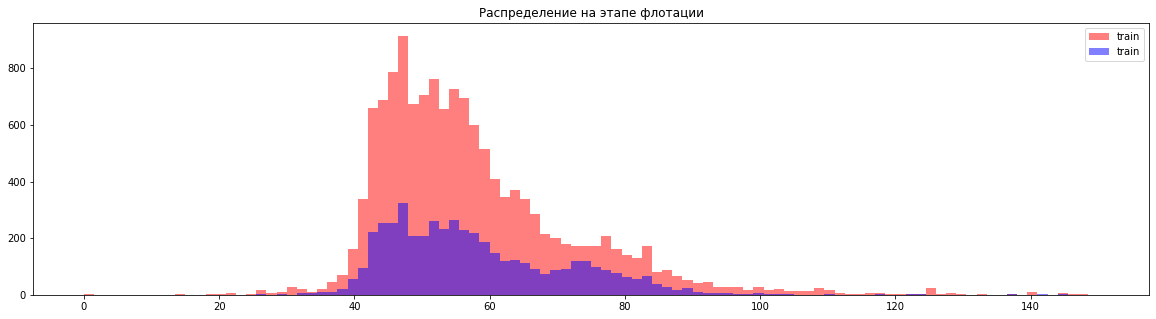

In [20]:
hist0 = train['rougher.input.feed_size']
histogram = test['rougher.input.feed_size']

plt.hist(hist0, bins=100, color='red', range=(0, 150), label='train', alpha=0.5)
plt.hist(histogram, bins=100, color='blue', range=(0, 150), label='train', alpha=0.5)
plt.legend()
plt.title('Распределение на этапе флотации')
plt.show()

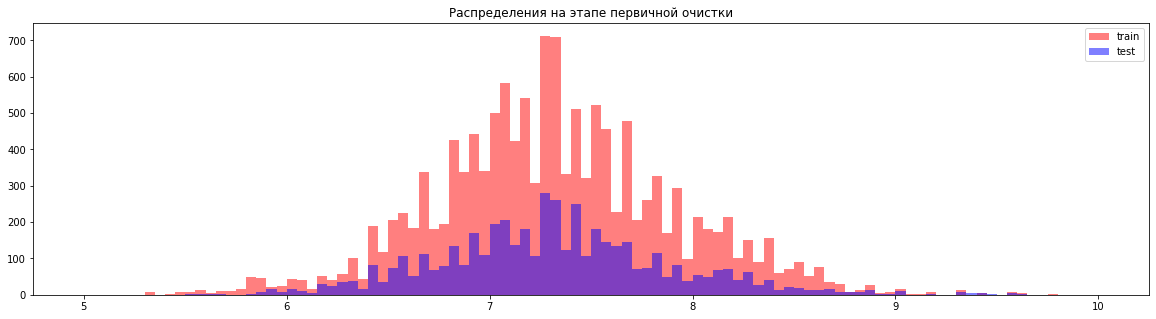

In [21]:
graph = train['primary_cleaner.input.feed_size']
graph0 = test['primary_cleaner.input.feed_size']

plt.hist(graph, bins=100, color='red', range=(5, 10), label='train', alpha=0.5)
plt.hist(graph0, bins=100, color='blue', range=(5, 10), label='test', alpha=0.5)

plt.legend()
plt.title('Распределения на этапе первичной очистки')
plt.show()

Выводы:

В ходе процесса флотации было обнаружено, что размеры гранул на обучающей выборке не превышают 55, а на тестовой выборке - 45. В свою очередь, при первичной очистке размеры гранул не превышали 7,4 на обучающей выборке и 7,7 на тестовой выборке. Следует отметить, что распределение размеров гранул на этапе первичной очистки напоминает нормальное распределение, при этом, на тестовой выборке объекты сконцентрированы в интервале от 6,7 до 7,7. Это говорит о том, что размеры гранул на данном этапе имеют примерно одинаковые значения.

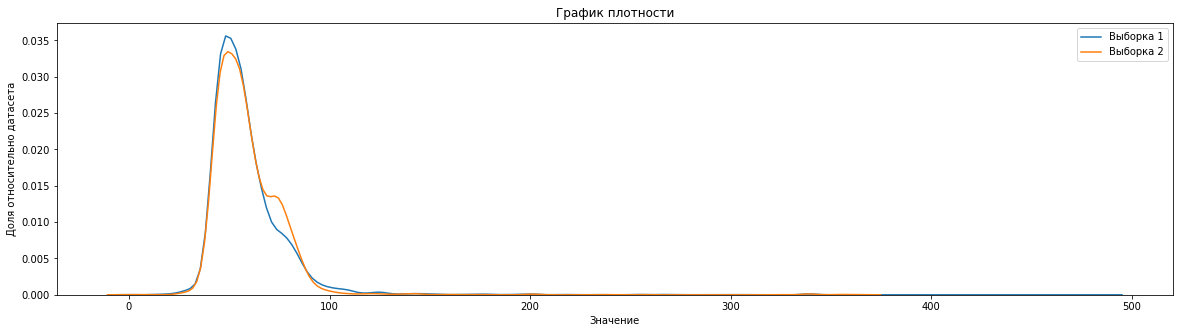

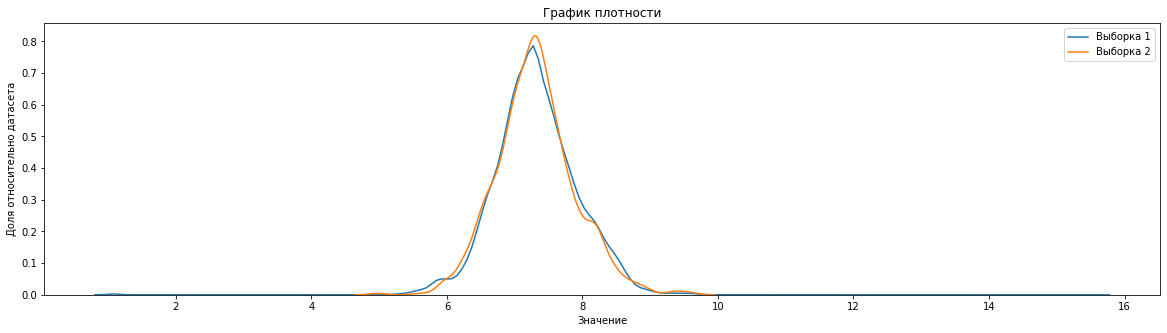

In [22]:
sns.kdeplot(train['rougher.input.feed_size'], label='Выборка 1')
sns.kdeplot(test['rougher.input.feed_size'], label='Выборка 2')

plt.legend()
plt.xlabel('Значение')
plt.ylabel('Доля относительно датасета')
plt.title('График плотности')
plt.show()


sns.kdeplot(train['primary_cleaner.input.feed_size'], label='Выборка 1')
sns.kdeplot(test['primary_cleaner.input.feed_size'], label='Выборка 2')

plt.legend()
plt.xlabel('Значение')
plt.ylabel('Доля относительно датасета')
plt.title('График плотности')
plt.show()

## Модель

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4800 non-null   object 
 1   rougher.input.feed_au                       4800 non-null   float64
 2   rougher.input.feed_ag                       4800 non-null   float64
 3   rougher.input.feed_pb                       4800 non-null   float64
 4   rougher.input.feed_sol                      4800 non-null   float64
 5   rougher.input.feed_rate                     4800 non-null   float64
 6   rougher.input.feed_size                     4800 non-null   float64
 7   rougher.input.floatbank10_sulfate           4800 non-null   float64
 8   rougher.input.floatbank10_xanthate          4800 non-null   float64
 9   rougher.state.floatbank10_a_air             4800 non-null   float64
 10  rougher.stat

In [24]:
STATE = 12345

In [39]:
def smape_scorer(y_true,y_pred):
    smapeb = abs((100*abs(y_true-y_pred)/((abs(y_true)+abs(y_pred))/2)).mean())
    return smapeb

def smape_final(smape_rough, smape_final):
    return (0.25*smape_rough + 0.75*smape_final)

def smape_unweighted(y_true, y_pred):
    error = abs(y_true - y_pred)
    scale = (abs(y_true) + abs(y_pred)) / 2 + 0.000000001
    result = (error / scale).mean()
    return result * 100

def sMAPE_calculator(y_target, y_predict):
    smapes = np.mean(abs(y_target - y_predict) / ((abs(y_target) + abs(y_predict)) / 2)) * 100
    return smapes

In [52]:
def calculate_smape(true_values, predictions):
    absolute_difference = abs(true_values - predictions)
    sum_values = true_values + predictions
    smape = 2 * absolute_difference / sum_values
    smape_mean = smape.mean()
    return smape_mean * 100

def calculate_weighted_smape(smape_model1, smape_model2):
    weighted_smape = (2 * smape_model1 + smape_model2) / 3
    return weighted_smape

In [56]:
not_included_to_test = []
for i in range(len(train.columns)):
    if train.columns[i] not in test.columns:
        not_included_to_test.append(train.columns[i])
print(not_included_to_test)

target_train = train['rougher.output.recovery']
target_train_fin = train['final.output.recovery']

features_train_final = train.drop(not_included_to_test,axis=1)
features_train_final = features_train_final.drop(['date'],
axis=1)
target_train_final = train['final.output.recovery']

features_train_final.shape, target_train.shape, target_train_fin.shape, target_train_final.shape

['rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.tail_au', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_sol', 'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol

((13613, 54), (13613,), (13613,), (13613,))

In [49]:
score = make_scorer(calculate_smape, greater_is_better = False) 

In [28]:
model_rfr = make_pipeline(StandardScaler(), RandomForestRegressor())

model_dtr = make_pipeline(StandardScaler(), DecisionTreeRegressor())

model_lr = make_pipeline(StandardScaler(), LinearRegression())


param_rfr = {'randomforestregressor__n_estimators':[1,100],
                  'randomforestregressor__max_depth':[1,10],
                  'randomforestregressor__random_state':[12345],
                  'randomforestregressor__n_jobs':[-1]}

param_dtr = {'decisiontreeregressor__max_depth':[1,10]}

param_lr = {'linearregression__normalize':[False]}

In [29]:
rough_rfr = GridSearchCV(model_rfr, param_grid=param_rfr, cv=5, scoring=score)
final_rfr = GridSearchCV(model_rfr, param_grid=param_rfr, cv=5, scoring=score)

rough_dtr = GridSearchCV(model_dtr, param_grid=param_dtr, cv=5, scoring=score)
final_dtr = GridSearchCV(model_dtr, param_grid=param_dtr, cv=5, scoring=score)

rough_lr = GridSearchCV(model_lr, param_grid=param_lr, scoring=score)
final_lr = GridSearchCV(model_lr, param_grid=param_lr, scoring=score)

In [30]:
rough_rfr.fit(features_train_final, target_train)
final_rfr.fit(features_train_final, target_train_final)

rough_dtr.fit(features_train_final, target_train)
final_dtr.fit(features_train_final, target_train_final)

rough_lr.fit(features_train_final, target_train)
final_lr.fit(features_train_final, target_train_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__normalize': [False]},
             scoring=make_scorer(smape_scorer, greater_is_better=False))

In [69]:
bs_rough_rfr = rough_rfr.best_score_
bs_final_rfr = final_rfr.best_score_

bs_rough_dtr = rough_dtr.best_score_
bs_final_dtr = final_dtr.best_score_

bs_rough_lr = rough_lr.best_score_
bs_final_lr = final_lr.best_score_

smape_rfr = smape_unweighted(bs_rough_rfr, bs_final_rfr)
smape_dtr = smape_unweighted(bs_rough_dtr, bs_final_dtr)
smape_lr = smape_unweighted(bs_rough_lr, bs_final_lr)

print('Rougher, лучший результат Случайного леса    =', bs_rough_rfr)
print('Rougher, лучший результат Дерева решений     =', bs_rough_dtr)
print('Rougher, лучший результат Линейной регрессии =', bs_rough_lr)
print()
print('Final, лучший результат Случайного леса    =', bs_final_rfr)
print('Final, лучший результат Дерева решений     =', bs_final_dtr)
print('Final, лучший результат Линейной регрессии =', bs_final_lr)
print()
print('sMAPE по Случайному лесу    =', smape_rfr)
print('sMAPE по Дереву решений     =', smape_dtr)
print('sMAPE по Линейной регрессии =', smape_lr)

Rougher, лучший результат Случайного леса    = -6.808154009846916
Rougher, лучший результат Дерева решений     = -7.16096533475435
Rougher, лучший результат Линейной регрессии = -7.005146464308486

Final, лучший результат Случайного леса    = -8.745472523815423
Final, лучший результат Дерева решений     = -8.804727299125998
Final, лучший результат Линейной регрессии = -9.285261832443027

sMAPE по Случайному лесу    = 24.911470125973512
sMAPE по Дереву решений     = 20.59117636622361
sMAPE по Линейной регрессии = 27.993348310481426


In [68]:
fin_smape_rfr = smape_final(bs_rough_rfr, bs_final_rfr)
fin_smape_dtr = smape_final(bs_rough_dtr, bs_final_dtr)
fin_smape_lr = smape_final(bs_rough_lr, bs_final_lr)

print('Итоговое sMAPE Случайного леса =', fin_smape_rfr)
print('Итоговое sMAPE Дерева решений =', fin_smape_dtr)
print('Итоговое sMAPE Линейной регрессии =', fin_smape_lr)

Итоговое sMAPE Случайного леса = -8.261142895323296
Итоговое sMAPE Дерева решений = -8.393786808033086
Итоговое sMAPE Линейной регрессии = -8.715232990409392


In [33]:
test = test.merge(full[['rougher.output.recovery', 'final.output.recovery', 'date']],
                         how = 'left', on= 'date')
test.dropna()
test.reset_index()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4799
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4800 non-null   object 
 1   rougher.input.feed_au                       4800 non-null   float64
 2   rougher.input.feed_ag                       4800 non-null   float64
 3   rougher.input.feed_pb                       4800 non-null   float64
 4   rougher.input.feed_sol                      4800 non-null   float64
 5   rougher.input.feed_rate                     4800 non-null   float64
 6   rougher.input.feed_size                     4800 non-null   float64
 7   rougher.input.floatbank10_sulfate           4800 non-null   float64
 8   rougher.input.floatbank10_xanthate          4800 non-null   float64
 9   rougher.state.floatbank10_a_air             4800 non-null   float64
 10  rougher.stat

In [65]:
features_test = test.drop(['rougher.output.recovery', 'final.output.recovery','date'], axis=1)

target_test = test['rougher.output.recovery']
target_test_fin = test['final.output.recovery']

test_rough = rough_rfr.predict(features_test) 
test_final = final_rfr.predict(features_test)

smape_r_test = smape_unweighted(target_test, test_rough)
fin_test_smape = smape_unweighted(target_test_fin, test_final)

FINAL_smape = smape_final(smape_r_test, fin_test_smape)
print('sMAPE в процентах на тестовой выборке =', FINAL_smape)

sMAPE в процентах на тестовой выборке = 6.8719010306986


In [73]:
for strategy in ['mean','median']:
    dummy_rough = DummyRegressor(strategy=strategy)
    dummy_final = DummyRegressor(strategy=strategy)
    
    dummy_rough.fit(features_train_final, target_train)
    dummy_final.fit(features_train_final, target_train_fin)
    
    rough = dummy_rough.predict(test)
    final = dummy_final.predict(test)
    
    final_smape = smape_final(smape_scorer(target_test, rough),
                              smape_scorer(target_test_fin, final))

    print('Для', strategy, 'sMAPE =', round(final_smape,3))

Для mean sMAPE = 7.933
Для median sMAPE = 7.77


# Вывод: 
На тренировочной выборке были обучены три модели: случайный лес, дерево решений и линейная регрессия, применяя кросс-валидацию. Анализ метрик качества показал, что случайный лес демонстрирует наилучшие результаты. Следовательно, для проверки на тестовой выборке была выбрана данная модель. Симметричная средняя абсолютная процентная ошибка на тестовой выборке составила 6,871. В сравнении с константной моделью, метрики, полученные при использовании случайного леса, демонстрируют более высокое качество. Таким образом, можно сделать вывод о том, что случайный лес прошел проверку на вменяемость. В контексте модели машинного обучения для «Цифры», случайный лес является прототипом, так как он показывает наилучшие результаты при предсказании коэффициента восстановления золота из золотосодержащей руды, включая проверку на вменяемость.

## Чек-лист готовности проекта